## Task/End goal
> Be able to classify CODM users as satsfied/dissatisfied based on their review

In [61]:
import re
import nltk
import pandas as pd
from nltk.corpus import stopwords
from matplotlib import pyplot as plt
from nltk.tokenize import word_tokenize

In [188]:
data = pd.read_csv("Call Of Duty.csv")

In [189]:
data.head()

,reviews,ratings
0,I've been playing for years now and it's been ...,4
1,An annoying experience all round. Ever since t...,1
2,"I love the game though. It's close to real, bu...",3
3,I've been playing for years now and it's been ...,4
4,An annoying experience all round. Ever since t...,1


## EDA/Feature engineering

In [190]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3882 entries, 0 to 3881
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  3882 non-null   object
 1   ratings  3882 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 60.8+ KB


In [191]:
data.isna().sum()

reviews    0
ratings    0
dtype: int64

In [192]:
data.describe()

,ratings
count,3882.000000
mean,3.202473
std,1.572016
min,1.000000
25%,2.000000
50%,3.000000
75%,5.000000
max,5.000000


In [193]:
# Classifying reviews as binary (Satisfied =1, dissatisfied = 0)
# Satisfied user == 3+ stars rating, dissatisfied == 2< stars rating
data["satisfied"] = data["ratings"].apply(lambda x: 1 if x >=3 else 0)

In [194]:
data.head()

,reviews,ratings,satisfied
0,I've been playing for years now and it's been ...,4,1
1,An annoying experience all round. Ever since t...,1,0
2,"I love the game though. It's close to real, bu...",3,1
3,I've been playing for years now and it's been ...,4,1
4,An annoying experience all round. Ever since t...,1,0


In [195]:
# users grouped by satisfaction status
reviews_by_satisfaction = data.groupby("satisfied")

# number of satisfied and dissatisfied users
reviews_by_satisfaction["satisfied"].count()

satisfied
0    1382
1    2500
Name: satisfied, dtype: int64

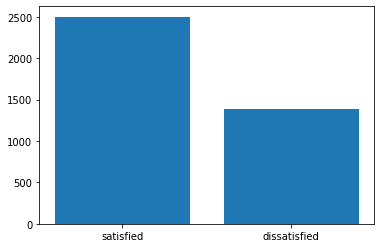

In [196]:
# Visualization of satisfide/dissatisfied ratings count

satisfied = reviews_by_satisfaction.get_group(1)
satisfied = satisfied["ratings"].count()

dissatisfied = reviews_by_satisfaction.get_group(0)
dissatisfied = dissatisfied["ratings"].count()

plt.bar(["satisfied", "dissatisfied"], [satisfied, dissatisfied])
plt.show()

In [199]:
# Making all texts lowercase.
data["reviews"] = data["reviews"].apply(lambda x: x.lower())

# Removing numbers.
data["reviews"] = data["reviews"].apply(lambda x: re.sub(r'[0-9]+', "", x))

# Removing white space
data["reviews"] = data["reviews"].apply(lambda x: x.strip())

# replacing emojis with text.
# These emojis are emojis that I found to be most common to CODM reviews.
data["reviews"] = data["reviews"].apply(lambda x: x.replace("😎", " cool_face ").replace("😴", " sleepy_face ")
.replace("👍", " thumbs_up ").replace("👎", " thumbs_down ").replace("👌", " nice ").replace("🖕", " middle_finger ")
.replace("😆", " excitement ").replace("😅", " awkward ").replace("⭐", " star ").replace("💯", " approval ")
.replace("🤘", " cool ").replace("😉", " wink_face ").replace("❤", " love ").replace("😁", " cheer ")
.replace("🎮", " controller ").replace("🌟", " glowing_star ").replace("😂", " laughing_face ")
.replace("🙃", " upside-down-face").replace("🤭", " surprise_face ").replace("😝", " playful_face ")
.replace("😩", " exhaustion_face ").replace("❤️", " love ").replace("😍", " adoration ").replace("🙏", " pray ")
.replace("🙄", " rolling_eyes ").replace("😭", " crying_face ").replace("😑", " neutral_face ").replace("😏", " smirk_face ")
.replace("😡", " angry_face ").replace("😪", " sleepy_face ").replace("😓", " frustration_face ").replace("😀", " cheer_face ")
.replace("😒", " unasumed_face ").replace(" 🏝", " desert_island ").replace("🥴", " woozy_face ").replace("😊", " smiling_face ")
.replace("🥰", " feeling_loved ").replace("😃", " cheer_face ").replace("🤬",  " being_vulgar ").replace("🥺", " pleeding_face ")
.replace("🤣", " floor_laughing ").replace("😔", " dissapointed_face ").replace("🤞", " for_luck ").replace("🤡", " clown_face ")
.replace("😤", " highly_annoyed ").replace("👿", " angry_face_with_horns ").replace("🙂", " weird_smile ").replace("😊", " happy ")
.replace("💪", " flexed_biceps ").replace("🤯", " mind_blown ").replace("📌", "pin").replace("😋", " tongue_out "))

# Removing special characters.
data["reviews"] = data["reviews"].apply(lambda x: x.replace(",", " ").replace(":", " ").replace(".", " ")
.replace("'", " ").replace("%", " ").replace(";", " ").replace("/", " ").replace('"', " ").replace("(", " ")
.replace(")", " ").replace("!", " ").replace("+", " ").replace("@", " ").replace("*", " ").replace("$", " ")
.replace("&", " ").replace("-", " ").replace("?", " ").replace("#", " ").replace("  ", " "))

# word tokenization
text_tokens = data["reviews"].apply(lambda review : word_tokenize(review, language="english"))

# removal of stop words
stop = stopwords.words('english')
data["final_tokens"] = data['reviews'].apply(lambda x: ' '.join([word for word in x.lower().split() if word not in (stop)]))

In [200]:
data.head()

,reviews,ratings,satisfied,final_tokens
0,i ve been playing for years now and it s been ...,4,1,playing years quite addictive u developers pls...
1,an annoying experience all round ever since th...,1,0,annoying experience round ever since update se...
2,i love the game though it s close to real but ...,3,1,love game though close real greatest problem c...
3,i ve been playing for years now and it s been ...,4,1,playing years quite addictive u developers pls...
4,an annoying experience all round ever since th...,1,0,annoying experience round ever since update se...


In [186]:
test = data["final_tokens"][9]
actual = data["reviews"][9]
# 8
print(test, "\n")
print(actual)

simply love game graphics good never boring thanks events also nerf persistence made modes hardpoint domination playable problem since last update season ping issue sometimes match much often enter gunfight ping flies ms ms making lose gunfight overall highly recommend downloading one best mobile experiences 

i m simply in love with this game the graphics are good never boring thanks to the events also there was the nerf of persistence that made the modes hardpoint and domination playable again the only problem i have since the last update of season  is the ping issue sometimes during a match much more often when i enter a gunfight my ping flies from ms to ms making me lose the gunfight but overall i highly recommend downloading it for one of the best mobile experiences 


In [187]:
# print(stopwords.words('english'))